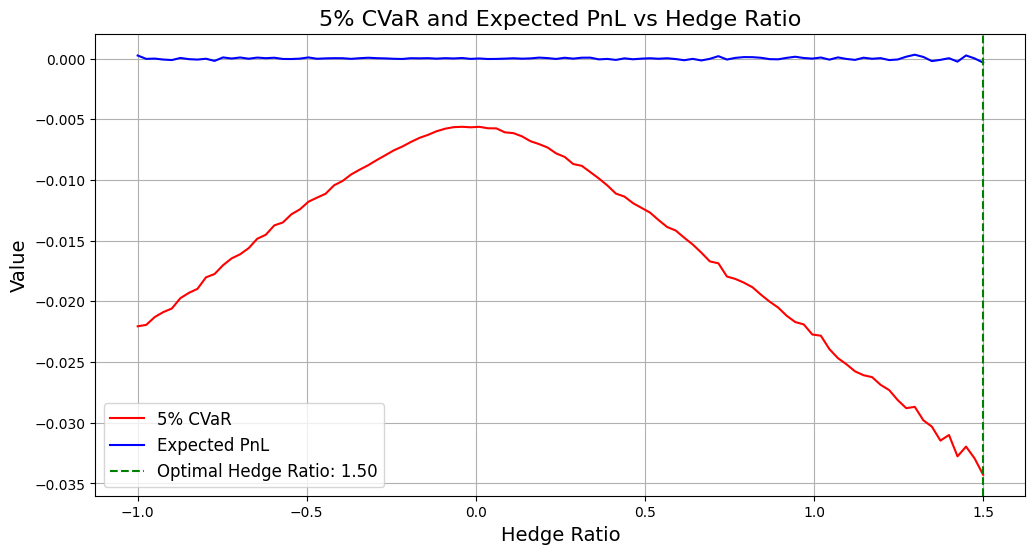

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
cov_matrix = pd.read_excel("covariance_matrix.xlsx", index_col=0)
init_values = pd.read_excel("init_values.xlsx", index_col=0)

# Define time step (e.g., weekly)
delta_t = 1 / 52  

# Define the mean vector mu
mu = np.array([0, 0.07 * delta_t, 0.06 * delta_t] + [0] * (Sigma_PnL.shape[0] - 3))


# Extract covariance matrix and initialize mean vector
Sigma_PnL = cov_matrix.values
mu = np.zeros(Sigma_PnL.shape[0])  # Zero drift for simplicity
num_simulations = 10000
hedge_ratios = np.linspace(-1, 1.5, 100)

# Define base portfolio weights
h_base = np.ones(Sigma_PnL.shape[0]) / Sigma_PnL.shape[0]  # Equal weights for simplicity

# Store results
cvar_values = []
expected_pnl_values = []

# Simulation loop
for h1 in hedge_ratios:
    h = np.zeros(Sigma_PnL.shape[0])  # Ensure correct dimension
    h[0] = h1  # Hedge ratio for the first asset
    h[1:] = h_base[1:]  # Fixed weights for remaining assets

    # Calculate portfolio mean and variance
    portfolio_mu = h @ mu
    portfolio_var = h @ Sigma_PnL @ h.T

    # Simulate PnL
    portfolio_pnl = np.random.normal(portfolio_mu, np.sqrt(portfolio_var), num_simulations)

    # Compute 5% CVaR
    cvar_5 = np.mean(np.sort(portfolio_pnl)[:int(0.05 * num_simulations)])
    cvar_values.append(cvar_5)
    expected_pnl_values.append(np.mean(portfolio_pnl))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(hedge_ratios, cvar_values, label="5% CVaR", color="red")
plt.plot(hedge_ratios, expected_pnl_values, label="Expected PnL", color="blue")
optimal_ratio = hedge_ratios[np.argmin(cvar_values)]
plt.axvline(x=optimal_ratio, linestyle="--", color="green", 
            label=f"Optimal Hedge Ratio: {optimal_ratio:.2f}")
plt.title("5% CVaR and Expected PnL vs Hedge Ratio", fontsize=16)
plt.xlabel("Hedge Ratio", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()
